In [3]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [5]:
# Downloaded country shapefile from: https://gadm.org/download_country_v3.html
shp_path = './gadm36_SOM_shp/gadm36_SOM_1.shp'
sf = shp.Reader(shp_path)

In [6]:
sf.records()

[Record #0: ['SOM', 'Somalia', 'SOM.1_1', 'Awdal', 'Adal | Adel', '', 'Gobolka', 'Region', '', 'SO.AW'],
 Record #1: ['SOM', 'Somalia', 'SOM.2_1', 'Bakool', '', '', 'Gobolka', 'Region', '', 'SO.BK'],
 Record #2: ['SOM', 'Somalia', 'SOM.3_1', 'Banaadir', 'Benadir', '', 'Gobolka', 'Region', '', 'SO.BN'],
 Record #3: ['SOM', 'Somalia', 'SOM.4_1', 'Bari', '', '', 'Gobolka', 'Region', '', 'SO.BR'],
 Record #4: ['SOM', 'Somalia', 'SOM.5_1', 'Bay', 'Baay', '', 'Gobolka', 'Region', '', 'SO.BY'],
 Record #5: ['SOM', 'Somalia', 'SOM.6_1', 'Galguduud', 'Galgudug', '', 'Gobolka', 'Region', '', 'SO.GA'],
 Record #6: ['SOM', 'Somalia', 'SOM.7_1', 'Gedo', 'Gado', '', 'Gobolka', 'Region', '', 'SO.GE'],
 Record #7: ['SOM', 'Somalia', 'SOM.8_1', 'Hiiraan', 'Hiiran', '', 'Gobolka', 'Region', '', 'SO.HI'],
 Record #8: ['SOM', 'Somalia', 'SOM.9_1', 'Jubbada Dhexe', 'J. Dhexe| Central Juba| Middle Juba', '', 'Gobolka', 'Region', '', 'SO.JD'],
 Record #9: ['SOM', 'Somalia', 'SOM.10_1', 'Jubbada Hoose', 'J. H

In [7]:
# Tutorial from: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        

def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [8]:
df = read_shapefile(sf)
df.shape

(18, 11)

In [9]:
df.sample(5)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,coords
1,SOM,Somalia,SOM.2_1,Bakool,,,Gobolka,Region,,SO.BK,"[(43.11999893, 3.67000008), (43.13999939, 3.84..."
6,SOM,Somalia,SOM.7_1,Gedo,Gado,,Gobolka,Region,,SO.GE,"[(42.40000153, 1.95000005), (41.64003372, 1.94..."
8,SOM,Somalia,SOM.9_1,Jubbada Dhexe,J. Dhexe| Central Juba| Middle Juba,,Gobolka,Region,,SO.JD,"[(43.29847336, 0.446527), (43.29819489, 0.4465..."
14,SOM,Somalia,SOM.15_1,Shabeellaha Hoose,Sh. Hoose| Lower Shabele,,Gobolka,Region,,SO.SH,"[(44.04041672, 1.10736001), (44.04041672, 1.10..."
13,SOM,Somalia,SOM.14_1,Shabeellaha Dhexe,Sh. Dhexe| Central Shabele,,Gobolka,Region,,SO.SD,"[(45.77986145, 2.28569388), (45.7793045, 2.285..."


In [10]:
key = {}
for k, v in df.iterrows():
    key[v['NAME_1']] = k
key

{'Awdal': 0,
 'Bakool': 1,
 'Banaadir': 2,
 'Bari': 3,
 'Bay': 4,
 'Galguduud': 5,
 'Gedo': 6,
 'Hiiraan': 7,
 'Jubbada Dhexe': 8,
 'Jubbada Hoose': 9,
 'Mudug': 10,
 'Nugaal': 11,
 'Sanaag': 12,
 'Shabeellaha Dhexe': 13,
 'Shabeellaha Hoose': 14,
 'Sool': 15,
 'Togdheer': 16,
 'Woqooyi Galbeed': 17}

'\ny_lim = (-33.7,-33.3) # latitude \nx_lim = (-71, -70.25) # longitude\nplot_map(sf, x_lim, y_lim)\n'

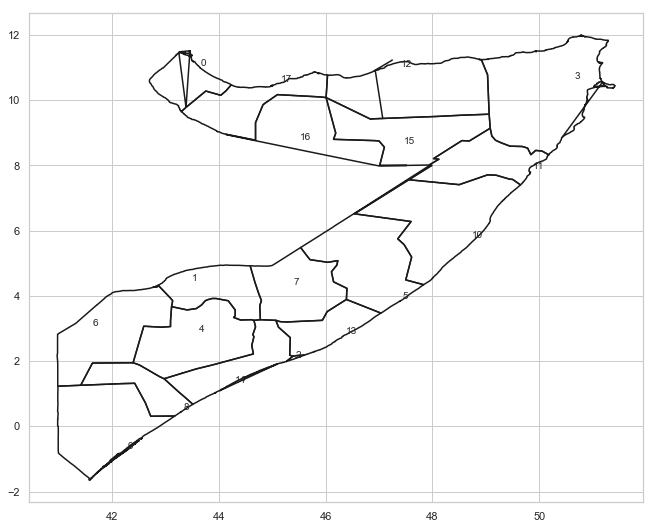

In [11]:
plot_map(sf)
"""
y_lim = (-33.7,-33.3) # latitude 
x_lim = (-71, -70.25) # longitude
plot_map(sf, x_lim, y_lim)
"""

<Figure size 792x648 with 0 Axes>

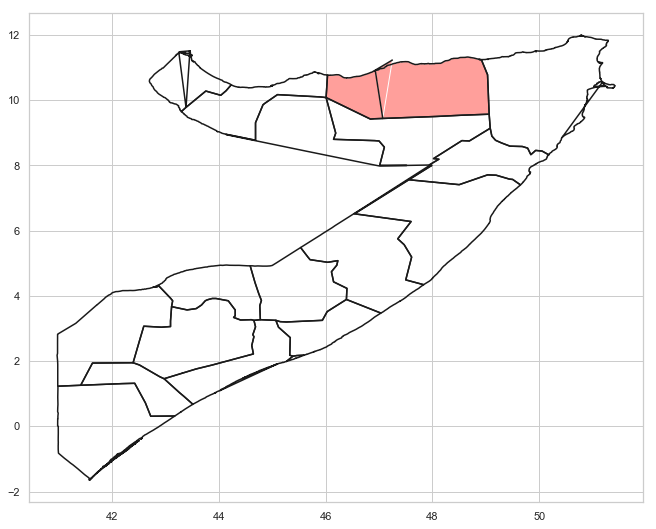

In [12]:
plot_map_fill(12, sf)